# Thompson Sampling

In this exercise, we will be experimenting with the Multi-armed bandit problem with the Thompson Sampling algorithm described in chapter 36 in the textbook.

## Setup

Suppose that we have $k$ arms, each with a random bernoulli reward at time $t$. The following code should be implemented to capture this setup.

# Import Dependencies

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Reward function
Question: Implement the reward function described in the setup. Specifically, given a $k$- dimensional vector 'avg' representing the true means, return a $k$- dimensional vector 'rew' such that $rew[i] = 1$ if $avg[i] > np.random.random()$ and $0$ otherwise.

In [37]:
def get_reward(avg):
    k = len(avg)
    rew = np.zeros(k)

    for i in range(k):
        rew[i] = 1 if avg[i] > np.random.random() else 0

    return rew

In [23]:
# def get_reward(avg):

#     rew = np.zeros(avg.size)
#     for i in range(avg.size):
#       if np.random.random() < avg[i]:
#         rew[i] = 1 
#       else: rew[i] = 0
#     return rew

In [28]:
# np.random.seed(0)
# get_reward(avg)



array([0., 0., 0., 0., 0.])

In [33]:
# def get_reward(avg):

#     rew = np.zeros(avg.size)
#     for i in range(avg.size):
#         if np.random.random() < avg[i]:
#             rew[i] = 1 
#         else: rew[i] = 0
#     return rew

## Algorithm review


Recall that the beta distribution is the conjugate prior probability distribution for the Bernoulli. Hence, in the algorithm we need to update the shape parameters alpha and beta. Check Algorithm 1 in: https://arxiv.org/pdf/1209.3353.pdf for more details. The algorithm is as follows:

1. Choose the arm with the maximum sample from the beta distribution with parameters alpha and beta.
3. Update these parameters and repeat.

## Goal of this exercise

Implement the following using the template provided below. Please use the variable names suggested in the comments.

1. Basic Thompson Sampling algorithm implementation
2. Plot the expected cumulative regret of the Thompson Sampling algorithm as a function of time.
3. The cumulative regret is expected to be logarithmic against the horizon. To check that this is case, plot the logarithm of the expected cumulative regret of the Thompson Sampling algorithm. (Hint: use the semilogx function in matplotlib.pyplot) 

## Thompson Sampling
Question:

Implement Thompson Sampling algorithm using the skeleton below. The initialization part is done. Fill out the rest of the skeleton.

In [38]:
class TS():    

    def __init__(self, avg):## Initialization
        self.means = avg
        self.num_arms = avg.size       
        self.best_arm = np.argmax(self.means)
        self.restart()
   
    def restart(self): ## Restart the algorithm: Reset the values of self.alpha and self.beta to ones (done). 
                       ## Reset the cumulative regret vector to zero.
        self.alpha = np.ones(self.num_arms)
        self.beta = np.ones(self.num_arms) 
        self.cum_reg = [0]
    
    def get_best_arm(self): ## For each time index, find the best arm according to Thompson Sampling
        return np.argmax(np.random.beta(self.alpha, self.beta))
    
    def update(self, arm, rew): ## Update the alpha and beta vectors
        self.alpha[arm] += rew
        self.beta[arm] += 1 - rew
       
    def update_reg(self, arm, rew_vec): ## Update the cumulative regret vector
        self.cum_reg += [self.cum_reg[-1] + rew_vec[self.best_arm] - rew_vec[arm]]
    
    def iterate(self, rew_vec):  ## Iterate the algorithm
        play = self.get_best_arm()
        self.update(play, rew_vec[play])
        self.update_reg(play, rew_vec)

# Experiment Function

The following code runs the Thompson Sampling algorithm for multiple instances. In the code below, num_inst is the number of instances, and num_iter is the time at which we stop.

In [40]:
def run_algo(avg, num_iter, num_inst):
    
    reg = np.zeros((num_inst, num_iter))
    
    algo = TS(avg)
    
    
    for k in range(num_inst):
        algo.restart()
        
        if (k+1)%10 == 0:
            print('Instance number = ', k+1)
        
        for t in range(num_iter-1):
            rew_vec = get_reward(avg)
            
            algo.iterate(rew_vec)
            
        reg[k,:] = np.asarray(algo.cum_reg)
        
    return reg

# Initializations
Use the following to initialize your algorithm. (This vector contains the actual mean rewards).

In [41]:
avg = np.asarray([0.30, 0.25, 0.20, 0.15, 0.10])
num_iter,num_inst = int(1e4), 50

# Run Experiment




In [42]:
reg = run_algo(avg, num_iter, num_inst)

Instance number =  10
Instance number =  20
Instance number =  30
Instance number =  40
Instance number =  50


## Plotting the Results

Questions: 

1 - Compute the average regret over the number of instances and plot it against the number of iterations. Label the x-axis as time, and the y-axis as Cumulative Regret. Add a caption labeling this as 'Cumulative Regret with Thompson Sampling'.

2 - Use the semilogx function in matplotlib to check that the regret is logarithmic against horizon.

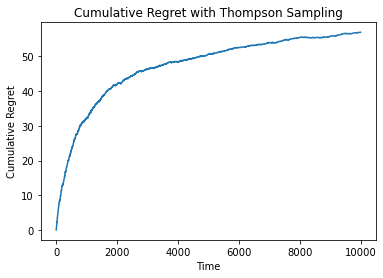

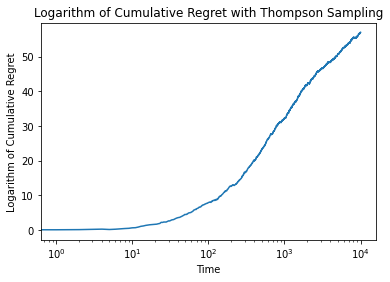

In [43]:
# Plotting the average cumulative regret
avg_cum_reg = np.mean(reg, axis=0)
plt.plot(avg_cum_reg)
plt.xlabel('Time')
plt.ylabel('Cumulative Regret')
plt.title('Cumulative Regret with Thompson Sampling')
plt.show()

# Plotting the logarithm of the average cumulative regret
plt.semilogx(avg_cum_reg)
plt.xlabel('Time')
plt.ylabel('Logarithm of Cumulative Regret')
plt.title('Logarithm of Cumulative Regret with Thompson Sampling')
plt.show()